# Assignment 1.2
### Jakub Iliński 346796

#### data preparation

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier
from tqdm.auto import tqdm
import seaborn as sns

# download mnist
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

with np.load('mnist.npz') as data:
    random_idxs = random.sample(range(len(data['train_data'])), len(data['train_data'])//25) # 2400 records is enough
    X = data['train_data'][random_idxs]
    y = data['train_labels'][random_idxs]
 
# normalize data
X = X.astype(np.float32) / 255

# reshape
X = X.reshape(-1, 28*28)

# print random element
X.shape, y.shape

4049.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4056.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


((2400, 784), (2400,))

### implementation of loo cv

In [23]:
res = []
ks = range(1, 11)

for k in tqdm(ks):
    correct, incorrect = 0, 0
    for i in range(len(X)):
        # prepare data
        mask = np.ones(len(X), dtype=bool)
        mask[i] = False
        
        train_X = X[mask]
        train_y = y[mask]
        test_X = X[i][np.newaxis, :]
        test_y = y[i]
        
        # train model 
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_X, train_y)
        
        # make prediction
        pred = knn.predict(test_X)
        if pred == test_y:
            correct += 1
        else:
            incorrect += 1
    res.append({'k': k, 'acc': correct / (correct + incorrect)})

100%|██████████| 10/10 [02:24<00:00, 14.46s/it]


### data analys

In [37]:
df = pd.DataFrame(res)
list(df.sort_values(by='acc')['k'])


[2, 10, 9, 5, 7, 4, 8, 3, 6, 1]

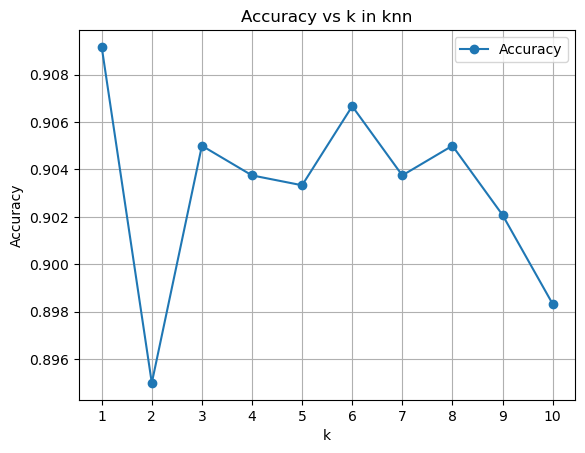

In [27]:
plt.plot(df['k'], df['acc'], marker='o', linestyle='-', label='Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k in knn')
plt.legend()
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

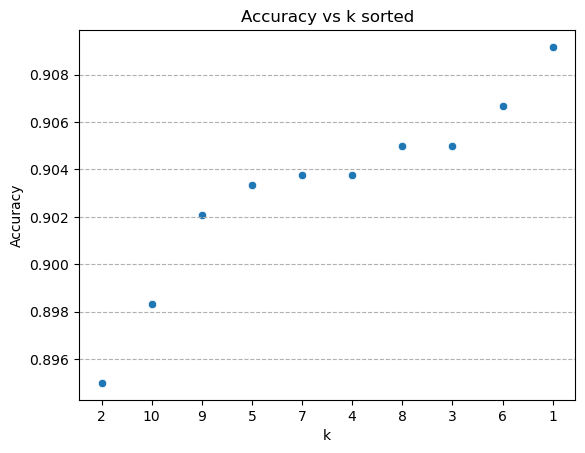

In [42]:
sns.scatterplot(x=range(len(df)), y='acc', data=df.sort_values(by='acc'))
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(len(df)), labels=df.sort_values(by='acc')['k'])
plt.title('Accuracy vs k sorted')
plt.grid(axis='y', linestyle='--')
plt.show()

### results
The best accuracy is for k equal 1